In [6]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [15]:
#Read the flights
df = pd.read_csv('data/model_df_version_1.csv')
df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,dest,crs_dep_time,crs_arr_time,distance,dep_delay
0,0,2019-02-12,DL,2070,DL,N915DN,GSP,ATL,1020,1126,153,-3.0
1,1,2019-05-25,AS,1438,AS,N844VA,LAX,SJC,2005,2130,308,53.0
2,2,2018-01-02,DL,2297,DL,N922DX,JAX,ATL,1540,1658,270,-5.0
3,3,2019-11-24,UA,4808,ZW,N419AW,IAD,ALB,1715,1854,325,-11.0
4,4,2018-07-17,AA,1815,AA,N703UW,CLT,DCA,1310,1437,331,-4.0


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [16]:
df['month'] = pd.DatetimeIndex(df['fl_date']).month
df['year'] = pd.DatetimeIndex(df['fl_date']).year
df.head(2)

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,dest,crs_dep_time,crs_arr_time,distance,dep_delay,month,year
0,0,2019-02-12,DL,2070,DL,N915DN,GSP,ATL,1020,1126,153,-3.0,2,2019
1,1,2019-05-25,AS,1438,AS,N844VA,LAX,SJC,2005,2130,308,53.0,5,2019


In [23]:
df['month_name']=df['month'].apply(lambda x: calendar.month_abbr[x])

In [24]:
df.groupby(['year','month_name']).size()

year  month_name
2018  Apr           6367
      Aug           6910
      Dec           6381
      Feb           5530
      Jan           5860
      Jul           6926
      Jun           6676
      Mar           6585
      May           6616
      Nov           6352
      Oct           6554
      Sep           6261
2019  Apr           6515
      Aug           7087
      Dec           6837
      Feb           5752
      Jan           6145
      Jul           7084
      Jun           6842
      Mar           6773
      May           6769
      Nov           6585
      Oct           6767
      Sep           6515
dtype: int64

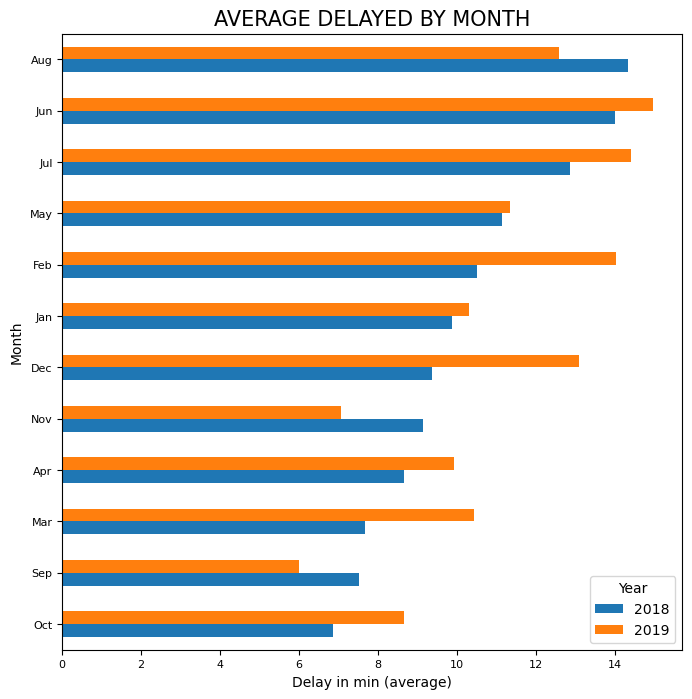

In [43]:

# Pivot the DataFrame and calculate the mean dep_delay
pivot_df = df.pivot_table(index='month_name', columns='year', values='dep_delay', aggfunc='mean')

# Sort the pivot table by dep_delay in descending order
pivot_df = pivot_df.sort_values(by=pivot_df.columns.tolist(), ascending=True)

# Create the horizontal bar plot
pivot_df.plot.barh(stacked=False, figsize=(8, 8))

plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
plt.xlabel('Delay in min (average)', fontsize=10)
plt.ylabel('Month', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.legend(title='Year')

plt.show()

In [45]:
#vertically bar graf
# # Pivot the DataFrame and calculate the mean dep_delay
# pivot_df = df.pivot_table(index='month_name', columns='year', values='dep_delay', aggfunc='mean')

# # Sort the pivot table by dep_delay in descending order
# pivot_df = pivot_df.sort_values(by=pivot_df.columns.tolist(), ascending=True)

# # Create the horizontal bar plot
# pivot_df.plot.bar(stacked=False, figsize=(8, 8))

# plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
# plt.xlabel('Delay in min (average)', fontsize=10)
# plt.ylabel('Month', fontsize=10)
# plt.xticks(fontsize=8)
# plt.yticks(rotation=0, fontsize=8)
# plt.legend(title='Year')

# plt.show()

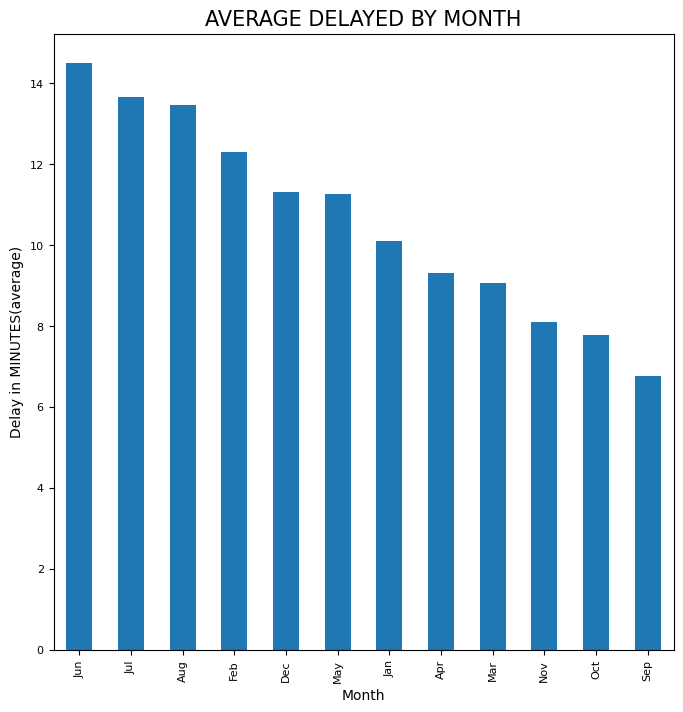

In [47]:
#total per months
plt.figure(figsize=(8,8))
df.groupby('month_name').dep_delay.mean().sort_values(ascending=False).plot.bar()
plt.title('AVERAGE DELAYED BY MONTH', fontsize=15)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Delay in MINUTES(average)', fontsize=10)
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.show()